<a href="https://colab.research.google.com/github/Facco-Bruno/Alura-ML/blob/Master/Sistemas_de_recomendacao_de_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas de Recomendação

In [1]:
import pandas as pd

filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,307,3.5,1.256677e+09
1,1,481,3.5,1.256677e+09
2,1,1091,1.5,1.256677e+09
3,1,1257,4.5,1.256677e+09
4,1,1449,4.5,1.256677e+09


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,1.217600e+06,1.217600e+06,1.217600e+06,1.217599e+06
mean,6.123609e+03,1.885230e+04,3.521909e+00,1.192965e+09
std,3.527587e+03,3.571146e+04,1.075477e+00,2.187191e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.228736e+08
25%,2.981000e+03,1.092000e+03,3.000000e+00,9.957289e+08
50%,6.187000e+03,2.710000e+03,3.500000e+00,1.172541e+09
75%,9.129000e+03,7.153000e+03,4.000000e+00,1.428275e+09
max,1.222000e+04,1.938610e+05,5.000000e+00,1.537932e+09


## Recomendação Heurística de total de votos

In [4]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head(10)

356     4176
318     4165
296     3956
593     3772
2571    3605
260     3530
480     3248
527     3115
110     3015
1       2965
Name: filmeId, dtype: int64

In [5]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2965.0
2,Jumanji (1995),Adventure|Children|Fantasy,1193.0
3,Grumpier Old Men (1995),Comedy|Romance,725.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,150.0
5,Father of the Bride Part II (1995),Comedy,690.0


In [7]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,4176.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,4165.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,3956.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,3772.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,3605.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,3530.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3248.0
527,Schindler's List (1993),Drama|War,3115.0
110,Braveheart (1995),Action|Drama|War,3015.0


In [8]:
notas_medias = notas.groupby("filmeId").mean()["nota"]
notas_medias.head()

filmeId
1    3.879764
2    3.212909
3    3.205517
4    3.006667
5    3.068116
Name: nota, dtype: float64

In [9]:
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,4176.0,4.059387
318,"Shawshank Redemption, The (1994)",Crime|Drama,4165.0,4.413085
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,3956.0,4.171638
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,3772.0,4.139979
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,3605.0,4.150485
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,3530.0,4.115156
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3248.0,3.677648
527,Schindler's List (1993),Drama|War,3115.0,4.257945
110,Braveheart (1995),Action|Drama|War,3015.0,4.006468


## Nota média e votos

In [10]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
178345,This Is Your Death (2017),Drama,1.0,5.0
142917,Distractions (2015),Comedy,1.0,5.0
6914,Preaching to the Perverted (1997),Comedy|Drama,1.0,5.0
142959,Spicy Love Soup (1997),(no genres listed),1.0,5.0
56485,Return to Sender (2004),Drama|Thriller,1.0,5.0
143047,Dark Blood (2012),Thriller,1.0,5.0
114980,Grace Unplugged (2013),Drama|Musical,1.0,5.0
143500,The Hunt for the BTK Killer (2005),Crime|Drama|Thriller,1.0,5.0
143547,The Phantom of the Opera at the Royal Albert H...,Drama|Romance,1.0,5.0


In [11]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
8982,I Am David (2003),Drama,10.0,4.500000
6967,Dead of Night (1945),Horror|Mystery,10.0,4.500000
27879,DiG! (2004),Documentary,12.0,4.500000
73759,Hellsing Ultimate OVA Series (2006),Action|Animation|Horror,14.0,4.500000
318,"Shawshank Redemption, The (1994)",Crime|Drama,4165.0,4.413085
72714,Earthlings (2006),Documentary,10.0,4.400000
134849,Duck Amuck (1953),Animation|Children|Comedy,14.0,4.392857
170705,Band of Brothers (2001),Action|Drama|War,46.0,4.391304
7068,Last Year at Marienbad (L'Année dernière à Mar...,Drama|Mystery|Romance,13.0,4.384615


In [12]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,4165.0,4.413085
858,"Godfather, The (1972)",Crime|Drama,2603.0,4.319631
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2710.0,4.302399
7234,"Strada, La (1954)",Drama,54.0,4.287037
159817,Planet Earth (2006),Documentary,58.0,4.258621
527,Schindler's List (1993),Drama|War,3115.0,4.257945
1203,12 Angry Men (1957),Drama,758.0,4.255277
1221,"Godfather: Part II, The (1974)",Crime|Drama,1675.0,4.251045
908,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller,841.0,4.244352


In [13]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2965.0,3.879764
21,Get Shorty (1995),Comedy|Crime|Thriller,1119.0,3.561662
19,Ace Ventura: When Nature Calls (1995),Comedy,1112.0,2.633094
10,GoldenEye (1995),Action|Adventure|Thriller,1447.0,3.455079
11,"American President, The (1995)",Comedy|Drama|Romance,871.0,3.687141
7,Sabrina (1995),Comedy|Romance,705.0,3.356738
2,Jumanji (1995),Adventure|Children|Fantasy,1193.0,3.212909


In [14]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,1179.0,3.701018
50601,Bridge to Terabithia (2007),Adventure|Children|Fantasy,80.0,3.556250
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,533.0,3.489681
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,561.0,3.408200
82169,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy,104.0,3.317308
59501,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,167.0,3.227545
1009,Escape to Witch Mountain (1975),Adventure|Children|Fantasy,110.0,3.150000
56171,"Golden Compass, The (2007)",Adventure|Children|Fantasy,140.0,3.150000
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,313.0,3.044728


# Collaborative filtering x Content based filtering

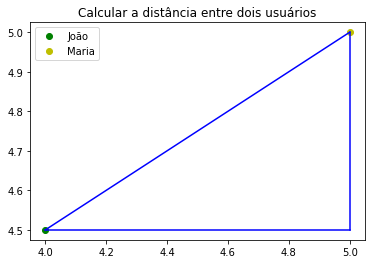

In [15]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

In [16]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [17]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [18]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distância entre usuários')

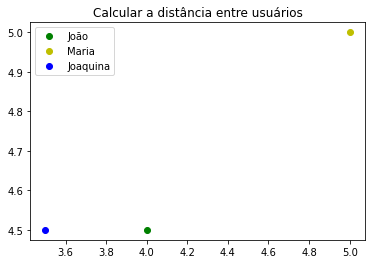

In [19]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre usuários")

In [20]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


In [21]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a - b)

In [22]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioId==%d" % usuario)
  notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
  return notas_do_usuario

In [23]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [24]:
usuario1.head()

,nota
filmeId,
307,3.5
481,3.5
1091,1.5
1257,4.5
1449,4.5


In [25]:
usuario4.head()

,nota
filmeId,
1,4.0
2,4.0
5,2.0
6,4.5
10,4.0


In [26]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

3.0413812651491097

In [27]:
diferencas.head()

,nota_esquerda,nota_direita
filmeId,,
481,3.5,4.0
1091,1.5,1.0
1590,2.5,3.5
1591,1.5,3.5
2478,4.0,3.0


In [28]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  return distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

In [ ]:
distancia_de_usuarios(1,4)

3.0413812651491097

In [29]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [30]:
distancia_de_usuarios(1,4)

[1, 4, 3.0413812651491097]

In [31]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print("Temos %d usuarios" % quantidade_de_usuarios)

Temos 12220 usuarios


In [32]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 0.0],
 [1, 3, 0.0],
 [1, 4, 3.0413812651491097],
 [1, 5, 0.0]]

In [34]:
def distancia_de_todos(voce_id):
  todos_os_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,100000.000000
3,1,4,3.041381
4,1,5,100000.000000


In [33]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < minimo):
    return [usuario_id1, usuario_id2, 100000]
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,100000.000000
3,1,4,3.041381
4,1,5,100000.000000


In [ ]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [ ]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,
5696,1,1.000000
593,1,1.118034
214,1,1.118034
2637,1,1.224745
590,1,1.322876


In [ ]:
def mais_proximos_de(voce_id, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [ ]:
def distancia_de_todos(voce_id, n = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if n:
    todos_os_usuarios = todos_os_usuarios[:n]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [ ]:
#mais_proximos_de(1, n = 50)

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < minimo):
    return None
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if numero_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [ ]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [ ]:
#mais_proximos_de(1, numero_de_usuarios_a_analisar = 50)

In [ ]:
def sugere_para(voce, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
  recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [ ]:
#sugere_para(1, numero_de_usuarios_a_analisar=50).head()

In [ ]:
def mais_proximos_de(voce_id, n_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(n_mais_proximos)

In [ ]:
#mais_proximos_de(1, n_mais_proximos = 2, numero_de_usuarios_a_analisar=300)

In [ ]:
def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [ ]:
#sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

In [ ]:
#sugere_para(1, numero_de_usuarios_a_analisar = 300).head()

In [ ]:
def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(k_mais_proximos)

In [ ]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)